In [52]:
import torch
import torch.optim as optim
import torch.utils.data
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

import numpy as np
from sklearn.model_selection import train_test_split

[[3, 1, 5, 7, 2, 4, 6], [8, 10, 0]]

In [65]:
# Parse file nums to dicts
def parseAnnotationNums(f):
    lines = []
    for line in f.readlines():
        lines.append(line.replace('\n', ''))
    return lines
        
annotation_file_path = os.getcwd() + '/../data/annotations'
annotations_files = os.listdir(annotation_file_path)
annotation_dict_train = {}
annotation_dict_dev = {}
for file in annotations_files:
    f = open(annotation_file_path  + '/' + file, "r")
    annotation = file.split('.')
    train_nums, dev_nums = train_test_split(parseAnnotationNums(f), test_size=0.2)
    annotation_dict_train[annotation[0]] = train_nums
    annotation_dict_dev[annotation[0]] = dev_nums

In [85]:
import shutil

# RUN THIS CELL ONLY ONCE

# os.mkdir(os.getcwd() + '/../data_organized')
# os.mkdir(os.getcwd() + '/../data_organized/dev')
# os.mkdir(os.getcwd() + '/../data_organized/train')


TRAIN_DESTINATION_PATH = os.getcwd() + '/../data_organized/train/'
DEV_DESTINATION_PATH = os.getcwd() + '/../data_organized/dev/'

img_file_path = os.getcwd() + '/../data/images/'

for ann in annotation_dict_train.keys():
    os.mkdir(TRAIN_DESTINATION_PATH + ann)
    for num in annotation_dict_train[ann]:
        img_file_name = 'im' + num + '.jpg'
        shutil.copy(img_file_path + img_file_name, TRAIN_DESTINATION_PATH + ann)

for ann in annotation_dict_dev.keys():
    os.mkdir(DEV_DESTINATION_PATH + ann)
    for num in annotation_dict_dev[ann]:
        img_file_name = 'im' + num + '.jpg'
        shutil.copy(img_file_path + img_file_name, DEV_DESTINATION_PATH + ann)

for a in annotation_dict_dev.keys():
    os.mkdir(os.getcwd() + '/../data_organized/dev/' + a)
    for a in annotation_dict_dev.keys()


In [2]:
#--- hyperparameters ---
N_EPOCHS = 10
BATCH_SIZE_TRAIN = 100
BATCH_SIZE_TEST = 100
LR = 0.001

In [3]:
#--- fixed constants ---
NUM_CLASSES = 24
DATA_DIR = '../data/sign_mnist_%s'

In [7]:
# --- Dataset initialization ---

# We transform image files' contents to tensors
# Plus, we can add random transformations to the training data if we like
# Think on what kind of transformations may be meaningful for this data.
# Eg., horizontal-flip is definitely a bad idea for sign language data.
# You can use another transformation here if you find a better one.
train_transform = transforms.Compose([  transforms.ColorJitter(),
                                        transforms.RandomPerspective(distortion_scale=0.2),
                                        transforms.ToTensor()])
test_transform = transforms.Compose([transforms.ToTensor()])

train_set = datasets.ImageFolder(DATA_DIR % 'train', transform=train_transform)
dev_set   = datasets.ImageFolder(DATA_DIR % 'dev',   transform=test_transform)
test_set  = datasets.ImageFolder(DATA_DIR % 'test',  transform=test_transform)


# Create Pytorch data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=BATCH_SIZE_TEST, shuffle=True)

In [5]:
#--- model ---
class CNN(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Linear(7*7*32, NUM_CLASSES)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


using cpu
Training: Epoch 0 - Batch 0/275: Loss: 3.4381 | Train Acc: 1.000% (1/100)
Training: Epoch 0 - Batch 1/275: Loss: 3.4039 | Train Acc: 3.500% (7/200)
Training: Epoch 0 - Batch 2/275: Loss: 3.3587 | Train Acc: 4.000% (12/300)
Training: Epoch 0 - Batch 3/275: Loss: 3.3525 | Train Acc: 3.250% (13/400)
Training: Epoch 0 - Batch 4/275: Loss: 3.3489 | Train Acc: 3.400% (17/500)
Training: Epoch 0 - Batch 5/275: Loss: 3.3343 | Train Acc: 3.000% (18/600)
Training: Epoch 0 - Batch 6/275: Loss: 3.3132 | Train Acc: 3.143% (22/700)
Training: Epoch 0 - Batch 7/275: Loss: 3.2988 | Train Acc: 3.750% (30/800)
Training: Epoch 0 - Batch 8/275: Loss: 3.2937 | Train Acc: 4.111% (37/900)
Training: Epoch 0 - Batch 9/275: Loss: 3.2852 | Train Acc: 4.500% (45/1000)
Training: Epoch 0 - Batch 10/275: Loss: 3.2903 | Train Acc: 4.636% (51/1100)
Training: Epoch 0 - Batch 11/275: Loss: 3.2791 | Train Acc: 4.833% (58/1200)
Training: Epoch 0 - Batch 12/275: Loss: 3.2743 | Train Acc: 5.000% (65/1300)
Training: 

Training: Epoch 0 - Batch 105/275: Loss: 2.9806 | Train Acc: 15.425% (1635/10600)
Training: Epoch 0 - Batch 106/275: Loss: 2.9777 | Train Acc: 15.579% (1667/10700)
Training: Epoch 0 - Batch 107/275: Loss: 2.9762 | Train Acc: 15.611% (1686/10800)
Training: Epoch 0 - Batch 108/275: Loss: 2.9741 | Train Acc: 15.697% (1711/10900)
Training: Epoch 0 - Batch 109/275: Loss: 2.9723 | Train Acc: 15.773% (1735/11000)
Training: Epoch 0 - Batch 110/275: Loss: 2.9702 | Train Acc: 15.865% (1761/11100)
Training: Epoch 0 - Batch 111/275: Loss: 2.9673 | Train Acc: 15.982% (1790/11200)
Training: Epoch 0 - Batch 112/275: Loss: 2.9641 | Train Acc: 16.177% (1828/11300)
Training: Epoch 0 - Batch 113/275: Loss: 2.9623 | Train Acc: 16.289% (1857/11400)
Training: Epoch 0 - Batch 114/275: Loss: 2.9598 | Train Acc: 16.409% (1887/11500)
Training: Epoch 0 - Batch 115/275: Loss: 2.9580 | Train Acc: 16.466% (1910/11600)
Training: Epoch 0 - Batch 116/275: Loss: 2.9559 | Train Acc: 16.513% (1932/11700)
Training: Epoch 

Training: Epoch 0 - Batch 205/275: Loss: 2.7596 | Train Acc: 25.029% (5156/20600)
Training: Epoch 0 - Batch 206/275: Loss: 2.7573 | Train Acc: 25.126% (5201/20700)
Training: Epoch 0 - Batch 207/275: Loss: 2.7553 | Train Acc: 25.197% (5241/20800)
Training: Epoch 0 - Batch 208/275: Loss: 2.7525 | Train Acc: 25.316% (5291/20900)
Training: Epoch 0 - Batch 209/275: Loss: 2.7507 | Train Acc: 25.357% (5325/21000)
Training: Epoch 0 - Batch 210/275: Loss: 2.7480 | Train Acc: 25.483% (5377/21100)
Training: Epoch 0 - Batch 211/275: Loss: 2.7461 | Train Acc: 25.557% (5418/21200)
Training: Epoch 0 - Batch 212/275: Loss: 2.7442 | Train Acc: 25.648% (5463/21300)
Training: Epoch 0 - Batch 213/275: Loss: 2.7423 | Train Acc: 25.738% (5508/21400)
Training: Epoch 0 - Batch 214/275: Loss: 2.7398 | Train Acc: 25.860% (5560/21500)
Training: Epoch 0 - Batch 215/275: Loss: 2.7374 | Train Acc: 26.009% (5618/21600)
Training: Epoch 0 - Batch 216/275: Loss: 2.7353 | Train Acc: 26.060% (5655/21700)
Training: Epoch 

Training: Epoch 1 - Batch 31/275: Loss: 2.0235 | Train Acc: 54.125% (1732/3200)
Training: Epoch 1 - Batch 32/275: Loss: 2.0191 | Train Acc: 54.364% (1794/3300)
Training: Epoch 1 - Batch 33/275: Loss: 2.0176 | Train Acc: 54.353% (1848/3400)
Training: Epoch 1 - Batch 34/275: Loss: 2.0158 | Train Acc: 54.257% (1899/3500)
Training: Epoch 1 - Batch 35/275: Loss: 2.0127 | Train Acc: 54.306% (1955/3600)
Training: Epoch 1 - Batch 36/275: Loss: 2.0099 | Train Acc: 54.432% (2014/3700)
Training: Epoch 1 - Batch 37/275: Loss: 2.0079 | Train Acc: 54.684% (2078/3800)
Training: Epoch 1 - Batch 38/275: Loss: 2.0056 | Train Acc: 54.718% (2134/3900)
Training: Epoch 1 - Batch 39/275: Loss: 2.0062 | Train Acc: 54.625% (2185/4000)
Training: Epoch 1 - Batch 40/275: Loss: 2.0049 | Train Acc: 54.683% (2242/4100)
Training: Epoch 1 - Batch 41/275: Loss: 2.0053 | Train Acc: 54.571% (2292/4200)
Training: Epoch 1 - Batch 42/275: Loss: 2.0020 | Train Acc: 54.651% (2350/4300)
Training: Epoch 1 - Batch 43/275: Loss: 

Training: Epoch 1 - Batch 133/275: Loss: 1.8687 | Train Acc: 58.366% (7821/13400)
Training: Epoch 1 - Batch 134/275: Loss: 1.8673 | Train Acc: 58.415% (7886/13500)
Training: Epoch 1 - Batch 135/275: Loss: 1.8660 | Train Acc: 58.426% (7946/13600)
Training: Epoch 1 - Batch 136/275: Loss: 1.8647 | Train Acc: 58.474% (8011/13700)
Training: Epoch 1 - Batch 137/275: Loss: 1.8633 | Train Acc: 58.543% (8079/13800)
Training: Epoch 1 - Batch 138/275: Loss: 1.8620 | Train Acc: 58.619% (8148/13900)
Training: Epoch 1 - Batch 139/275: Loss: 1.8601 | Train Acc: 58.679% (8215/14000)
Training: Epoch 1 - Batch 140/275: Loss: 1.8591 | Train Acc: 58.667% (8272/14100)
Training: Epoch 1 - Batch 141/275: Loss: 1.8578 | Train Acc: 58.711% (8337/14200)
Training: Epoch 1 - Batch 142/275: Loss: 1.8567 | Train Acc: 58.720% (8397/14300)
Training: Epoch 1 - Batch 143/275: Loss: 1.8560 | Train Acc: 58.750% (8460/14400)
Training: Epoch 1 - Batch 144/275: Loss: 1.8540 | Train Acc: 58.807% (8527/14500)
Training: Epoch 

Training: Epoch 1 - Batch 233/275: Loss: 1.7393 | Train Acc: 61.718% (14442/23400)
Training: Epoch 1 - Batch 234/275: Loss: 1.7386 | Train Acc: 61.711% (14502/23500)
Training: Epoch 1 - Batch 235/275: Loss: 1.7370 | Train Acc: 61.771% (14578/23600)
Training: Epoch 1 - Batch 236/275: Loss: 1.7361 | Train Acc: 61.797% (14646/23700)
Training: Epoch 1 - Batch 237/275: Loss: 1.7349 | Train Acc: 61.866% (14724/23800)
Training: Epoch 1 - Batch 238/275: Loss: 1.7339 | Train Acc: 61.908% (14796/23900)
Training: Epoch 1 - Batch 239/275: Loss: 1.7329 | Train Acc: 61.958% (14870/24000)
Training: Epoch 1 - Batch 240/275: Loss: 1.7311 | Train Acc: 62.021% (14947/24100)
Training: Epoch 1 - Batch 241/275: Loss: 1.7299 | Train Acc: 62.050% (15016/24200)
Training: Epoch 1 - Batch 242/275: Loss: 1.7286 | Train Acc: 62.066% (15082/24300)
Training: Epoch 1 - Batch 243/275: Loss: 1.7276 | Train Acc: 62.090% (15150/24400)
Training: Epoch 1 - Batch 244/275: Loss: 1.7268 | Train Acc: 62.102% (15215/24500)
Trai

Training: Epoch 2 - Batch 59/275: Loss: 1.3146 | Train Acc: 73.517% (4411/6000)
Training: Epoch 2 - Batch 60/275: Loss: 1.3149 | Train Acc: 73.377% (4476/6100)
Training: Epoch 2 - Batch 61/275: Loss: 1.3145 | Train Acc: 73.419% (4552/6200)
Training: Epoch 2 - Batch 62/275: Loss: 1.3152 | Train Acc: 73.397% (4624/6300)
Training: Epoch 2 - Batch 63/275: Loss: 1.3146 | Train Acc: 73.422% (4699/6400)
Training: Epoch 2 - Batch 64/275: Loss: 1.3143 | Train Acc: 73.415% (4772/6500)
Training: Epoch 2 - Batch 65/275: Loss: 1.3138 | Train Acc: 73.379% (4843/6600)
Training: Epoch 2 - Batch 66/275: Loss: 1.3131 | Train Acc: 73.388% (4917/6700)
Training: Epoch 2 - Batch 67/275: Loss: 1.3116 | Train Acc: 73.500% (4998/6800)
Training: Epoch 2 - Batch 68/275: Loss: 1.3113 | Train Acc: 73.478% (5070/6900)
Training: Epoch 2 - Batch 69/275: Loss: 1.3126 | Train Acc: 73.343% (5134/7000)
Training: Epoch 2 - Batch 70/275: Loss: 1.3117 | Train Acc: 73.423% (5213/7100)
Training: Epoch 2 - Batch 71/275: Loss: 

Training: Epoch 2 - Batch 161/275: Loss: 1.2402 | Train Acc: 74.790% (12116/16200)
Training: Epoch 2 - Batch 162/275: Loss: 1.2393 | Train Acc: 74.798% (12192/16300)
Training: Epoch 2 - Batch 163/275: Loss: 1.2380 | Train Acc: 74.835% (12273/16400)
Training: Epoch 2 - Batch 164/275: Loss: 1.2368 | Train Acc: 74.867% (12353/16500)
Training: Epoch 2 - Batch 165/275: Loss: 1.2357 | Train Acc: 74.904% (12434/16600)
Training: Epoch 2 - Batch 166/275: Loss: 1.2357 | Train Acc: 74.916% (12511/16700)
Training: Epoch 2 - Batch 167/275: Loss: 1.2360 | Train Acc: 74.881% (12580/16800)
Training: Epoch 2 - Batch 168/275: Loss: 1.2351 | Train Acc: 74.923% (12662/16900)
Training: Epoch 2 - Batch 169/275: Loss: 1.2341 | Train Acc: 74.912% (12735/17000)
Training: Epoch 2 - Batch 170/275: Loss: 1.2327 | Train Acc: 74.977% (12821/17100)
Training: Epoch 2 - Batch 171/275: Loss: 1.2323 | Train Acc: 75.006% (12901/17200)
Training: Epoch 2 - Batch 172/275: Loss: 1.2309 | Train Acc: 75.052% (12984/17300)
Trai

Training: Epoch 2 - Batch 261/275: Loss: 1.1734 | Train Acc: 76.302% (19991/26200)
Training: Epoch 2 - Batch 262/275: Loss: 1.1729 | Train Acc: 76.331% (20075/26300)
Training: Epoch 2 - Batch 263/275: Loss: 1.1726 | Train Acc: 76.330% (20151/26400)
Training: Epoch 2 - Batch 264/275: Loss: 1.1717 | Train Acc: 76.340% (20230/26500)
Training: Epoch 2 - Batch 265/275: Loss: 1.1712 | Train Acc: 76.350% (20309/26600)
Training: Epoch 2 - Batch 266/275: Loss: 1.1703 | Train Acc: 76.375% (20392/26700)
Training: Epoch 2 - Batch 267/275: Loss: 1.1694 | Train Acc: 76.388% (20472/26800)
Training: Epoch 2 - Batch 268/275: Loss: 1.1685 | Train Acc: 76.409% (20554/26900)
Training: Epoch 2 - Batch 269/275: Loss: 1.1681 | Train Acc: 76.411% (20631/27000)
Training: Epoch 2 - Batch 270/275: Loss: 1.1675 | Train Acc: 76.417% (20709/27100)
Training: Epoch 2 - Batch 271/275: Loss: 1.1671 | Train Acc: 76.412% (20784/27200)
Training: Epoch 2 - Batch 272/275: Loss: 1.1663 | Train Acc: 76.443% (20869/27300)
Trai

Training: Epoch 3 - Batch 89/275: Loss: 0.9457 | Train Acc: 81.233% (7311/9000)
Training: Epoch 3 - Batch 90/275: Loss: 0.9458 | Train Acc: 81.242% (7393/9100)
Training: Epoch 3 - Batch 91/275: Loss: 0.9469 | Train Acc: 81.152% (7466/9200)
Training: Epoch 3 - Batch 92/275: Loss: 0.9463 | Train Acc: 81.086% (7541/9300)
Training: Epoch 3 - Batch 93/275: Loss: 0.9451 | Train Acc: 81.160% (7629/9400)
Training: Epoch 3 - Batch 94/275: Loss: 0.9447 | Train Acc: 81.189% (7713/9500)
Training: Epoch 3 - Batch 95/275: Loss: 0.9445 | Train Acc: 81.146% (7790/9600)
Training: Epoch 3 - Batch 96/275: Loss: 0.9439 | Train Acc: 81.175% (7874/9700)
Training: Epoch 3 - Batch 97/275: Loss: 0.9452 | Train Acc: 81.122% (7950/9800)
Training: Epoch 3 - Batch 98/275: Loss: 0.9450 | Train Acc: 81.111% (8030/9900)
Training: Epoch 3 - Batch 99/275: Loss: 0.9449 | Train Acc: 81.120% (8112/10000)
Training: Epoch 3 - Batch 100/275: Loss: 0.9436 | Train Acc: 81.139% (8195/10100)
Training: Epoch 3 - Batch 101/275: Lo

Training: Epoch 3 - Batch 189/275: Loss: 0.9108 | Train Acc: 81.600% (15504/19000)
Training: Epoch 3 - Batch 190/275: Loss: 0.9108 | Train Acc: 81.576% (15581/19100)
Training: Epoch 3 - Batch 191/275: Loss: 0.9101 | Train Acc: 81.604% (15668/19200)
Training: Epoch 3 - Batch 192/275: Loss: 0.9099 | Train Acc: 81.580% (15745/19300)
Training: Epoch 3 - Batch 193/275: Loss: 0.9089 | Train Acc: 81.634% (15837/19400)
Training: Epoch 3 - Batch 194/275: Loss: 0.9088 | Train Acc: 81.626% (15917/19500)
Training: Epoch 3 - Batch 195/275: Loss: 0.9080 | Train Acc: 81.648% (16003/19600)
Training: Epoch 3 - Batch 196/275: Loss: 0.9077 | Train Acc: 81.650% (16085/19700)
Training: Epoch 3 - Batch 197/275: Loss: 0.9071 | Train Acc: 81.672% (16171/19800)
Training: Epoch 3 - Batch 198/275: Loss: 0.9069 | Train Acc: 81.663% (16251/19900)
Training: Epoch 3 - Batch 199/275: Loss: 0.9068 | Train Acc: 81.655% (16331/20000)
Training: Epoch 3 - Batch 200/275: Loss: 0.9062 | Train Acc: 81.682% (16418/20100)
Trai

Training: Epoch 4 - Batch 14/275: Loss: 0.7522 | Train Acc: 85.267% (1279/1500)
Training: Epoch 4 - Batch 15/275: Loss: 0.7560 | Train Acc: 85.000% (1360/1600)
Training: Epoch 4 - Batch 16/275: Loss: 0.7540 | Train Acc: 85.000% (1445/1700)
Training: Epoch 4 - Batch 17/275: Loss: 0.7547 | Train Acc: 85.111% (1532/1800)
Training: Epoch 4 - Batch 18/275: Loss: 0.7518 | Train Acc: 85.263% (1620/1900)
Training: Epoch 4 - Batch 19/275: Loss: 0.7488 | Train Acc: 85.400% (1708/2000)
Training: Epoch 4 - Batch 20/275: Loss: 0.7472 | Train Acc: 85.286% (1791/2100)
Training: Epoch 4 - Batch 21/275: Loss: 0.7482 | Train Acc: 85.227% (1875/2200)
Training: Epoch 4 - Batch 22/275: Loss: 0.7510 | Train Acc: 85.087% (1957/2300)
Training: Epoch 4 - Batch 23/275: Loss: 0.7531 | Train Acc: 85.375% (2049/2400)
Training: Epoch 4 - Batch 24/275: Loss: 0.7520 | Train Acc: 85.360% (2134/2500)
Training: Epoch 4 - Batch 25/275: Loss: 0.7530 | Train Acc: 85.346% (2219/2600)
Training: Epoch 4 - Batch 26/275: Loss: 

Training: Epoch 4 - Batch 117/275: Loss: 0.7337 | Train Acc: 85.831% (10128/11800)
Training: Epoch 4 - Batch 118/275: Loss: 0.7334 | Train Acc: 85.807% (10211/11900)
Training: Epoch 4 - Batch 119/275: Loss: 0.7328 | Train Acc: 85.825% (10299/12000)
Training: Epoch 4 - Batch 120/275: Loss: 0.7332 | Train Acc: 85.826% (10385/12100)
Training: Epoch 4 - Batch 121/275: Loss: 0.7330 | Train Acc: 85.828% (10471/12200)
Training: Epoch 4 - Batch 122/275: Loss: 0.7328 | Train Acc: 85.821% (10556/12300)
Training: Epoch 4 - Batch 123/275: Loss: 0.7323 | Train Acc: 85.847% (10645/12400)
Training: Epoch 4 - Batch 124/275: Loss: 0.7315 | Train Acc: 85.888% (10736/12500)
Training: Epoch 4 - Batch 125/275: Loss: 0.7318 | Train Acc: 85.889% (10822/12600)
Training: Epoch 4 - Batch 126/275: Loss: 0.7310 | Train Acc: 85.913% (10911/12700)
Training: Epoch 4 - Batch 127/275: Loss: 0.7313 | Train Acc: 85.914% (10997/12800)
Training: Epoch 4 - Batch 128/275: Loss: 0.7307 | Train Acc: 85.922% (11084/12900)
Trai

Training: Epoch 4 - Batch 217/275: Loss: 0.7071 | Train Acc: 86.500% (18857/21800)
Training: Epoch 4 - Batch 218/275: Loss: 0.7067 | Train Acc: 86.530% (18950/21900)
Training: Epoch 4 - Batch 219/275: Loss: 0.7062 | Train Acc: 86.541% (19039/22000)
Training: Epoch 4 - Batch 220/275: Loss: 0.7056 | Train Acc: 86.552% (19128/22100)
Training: Epoch 4 - Batch 221/275: Loss: 0.7052 | Train Acc: 86.563% (19217/22200)
Training: Epoch 4 - Batch 222/275: Loss: 0.7049 | Train Acc: 86.570% (19305/22300)
Training: Epoch 4 - Batch 223/275: Loss: 0.7047 | Train Acc: 86.567% (19391/22400)
Training: Epoch 4 - Batch 224/275: Loss: 0.7041 | Train Acc: 86.591% (19483/22500)
Training: Epoch 4 - Batch 225/275: Loss: 0.7040 | Train Acc: 86.580% (19567/22600)
Training: Epoch 4 - Batch 226/275: Loss: 0.7038 | Train Acc: 86.586% (19655/22700)
Training: Epoch 4 - Batch 227/275: Loss: 0.7034 | Train Acc: 86.583% (19741/22800)
Training: Epoch 4 - Batch 228/275: Loss: 0.7033 | Train Acc: 86.594% (19830/22900)
Trai

Training: Epoch 5 - Batch 43/275: Loss: 0.6067 | Train Acc: 88.409% (3890/4400)
Training: Epoch 5 - Batch 44/275: Loss: 0.6057 | Train Acc: 88.400% (3978/4500)
Training: Epoch 5 - Batch 45/275: Loss: 0.6060 | Train Acc: 88.413% (4067/4600)
Training: Epoch 5 - Batch 46/275: Loss: 0.6083 | Train Acc: 88.340% (4152/4700)
Training: Epoch 5 - Batch 47/275: Loss: 0.6064 | Train Acc: 88.438% (4245/4800)
Training: Epoch 5 - Batch 48/275: Loss: 0.6096 | Train Acc: 88.327% (4328/4900)
Training: Epoch 5 - Batch 49/275: Loss: 0.6094 | Train Acc: 88.340% (4417/5000)
Training: Epoch 5 - Batch 50/275: Loss: 0.6098 | Train Acc: 88.333% (4505/5100)
Training: Epoch 5 - Batch 51/275: Loss: 0.6087 | Train Acc: 88.385% (4596/5200)
Training: Epoch 5 - Batch 52/275: Loss: 0.6075 | Train Acc: 88.321% (4681/5300)
Training: Epoch 5 - Batch 53/275: Loss: 0.6070 | Train Acc: 88.315% (4769/5400)
Training: Epoch 5 - Batch 54/275: Loss: 0.6058 | Train Acc: 88.364% (4860/5500)
Training: Epoch 5 - Batch 55/275: Loss: 

Training: Epoch 5 - Batch 145/275: Loss: 0.5903 | Train Acc: 89.281% (13035/14600)
Training: Epoch 5 - Batch 146/275: Loss: 0.5907 | Train Acc: 89.252% (13120/14700)
Training: Epoch 5 - Batch 147/275: Loss: 0.5905 | Train Acc: 89.257% (13210/14800)
Training: Epoch 5 - Batch 148/275: Loss: 0.5900 | Train Acc: 89.268% (13301/14900)
Training: Epoch 5 - Batch 149/275: Loss: 0.5900 | Train Acc: 89.267% (13390/15000)
Training: Epoch 5 - Batch 150/275: Loss: 0.5893 | Train Acc: 89.285% (13482/15100)
Training: Epoch 5 - Batch 151/275: Loss: 0.5888 | Train Acc: 89.296% (13573/15200)
Training: Epoch 5 - Batch 152/275: Loss: 0.5889 | Train Acc: 89.288% (13661/15300)
Training: Epoch 5 - Batch 153/275: Loss: 0.5887 | Train Acc: 89.305% (13753/15400)
Training: Epoch 5 - Batch 154/275: Loss: 0.5882 | Train Acc: 89.316% (13844/15500)
Training: Epoch 5 - Batch 155/275: Loss: 0.5874 | Train Acc: 89.346% (13938/15600)
Training: Epoch 5 - Batch 156/275: Loss: 0.5875 | Train Acc: 89.331% (14025/15700)
Trai

Training: Epoch 5 - Batch 245/275: Loss: 0.5729 | Train Acc: 89.508% (22019/24600)
Training: Epoch 5 - Batch 246/275: Loss: 0.5726 | Train Acc: 89.530% (22114/24700)
Training: Epoch 5 - Batch 247/275: Loss: 0.5721 | Train Acc: 89.544% (22207/24800)
Training: Epoch 5 - Batch 248/275: Loss: 0.5717 | Train Acc: 89.550% (22298/24900)
Training: Epoch 5 - Batch 249/275: Loss: 0.5716 | Train Acc: 89.560% (22390/25000)
Training: Epoch 5 - Batch 250/275: Loss: 0.5713 | Train Acc: 89.582% (22485/25100)
Training: Epoch 5 - Batch 251/275: Loss: 0.5713 | Train Acc: 89.583% (22575/25200)
Training: Epoch 5 - Batch 252/275: Loss: 0.5710 | Train Acc: 89.573% (22662/25300)
Training: Epoch 5 - Batch 253/275: Loss: 0.5707 | Train Acc: 89.583% (22754/25400)
Training: Epoch 5 - Batch 254/275: Loss: 0.5707 | Train Acc: 89.576% (22842/25500)
Training: Epoch 5 - Batch 255/275: Loss: 0.5705 | Train Acc: 89.590% (22935/25600)
Training: Epoch 5 - Batch 256/275: Loss: 0.5706 | Train Acc: 89.576% (23021/25700)
Trai

Training: Epoch 6 - Batch 71/275: Loss: 0.4963 | Train Acc: 91.153% (6563/7200)
Training: Epoch 6 - Batch 72/275: Loss: 0.4959 | Train Acc: 91.164% (6655/7300)
Training: Epoch 6 - Batch 73/275: Loss: 0.4957 | Train Acc: 91.203% (6749/7400)
Training: Epoch 6 - Batch 74/275: Loss: 0.4959 | Train Acc: 91.200% (6840/7500)
Training: Epoch 6 - Batch 75/275: Loss: 0.4963 | Train Acc: 91.197% (6931/7600)
Training: Epoch 6 - Batch 76/275: Loss: 0.4972 | Train Acc: 91.156% (7019/7700)
Training: Epoch 6 - Batch 77/275: Loss: 0.4970 | Train Acc: 91.167% (7111/7800)
Training: Epoch 6 - Batch 78/275: Loss: 0.4969 | Train Acc: 91.114% (7198/7900)
Training: Epoch 6 - Batch 79/275: Loss: 0.4975 | Train Acc: 91.075% (7286/8000)
Training: Epoch 6 - Batch 80/275: Loss: 0.4974 | Train Acc: 91.074% (7377/8100)
Training: Epoch 6 - Batch 81/275: Loss: 0.4984 | Train Acc: 91.061% (7467/8200)
Training: Epoch 6 - Batch 82/275: Loss: 0.4978 | Train Acc: 91.108% (7562/8300)
Training: Epoch 6 - Batch 83/275: Loss: 

Training: Epoch 6 - Batch 171/275: Loss: 0.4920 | Train Acc: 91.128% (15674/17200)
Training: Epoch 6 - Batch 172/275: Loss: 0.4919 | Train Acc: 91.139% (15767/17300)
Training: Epoch 6 - Batch 173/275: Loss: 0.4914 | Train Acc: 91.144% (15859/17400)
Training: Epoch 6 - Batch 174/275: Loss: 0.4915 | Train Acc: 91.143% (15950/17500)
Training: Epoch 6 - Batch 175/275: Loss: 0.4912 | Train Acc: 91.159% (16044/17600)
Training: Epoch 6 - Batch 176/275: Loss: 0.4918 | Train Acc: 91.147% (16133/17700)
Training: Epoch 6 - Batch 177/275: Loss: 0.4915 | Train Acc: 91.146% (16224/17800)
Training: Epoch 6 - Batch 178/275: Loss: 0.4910 | Train Acc: 91.162% (16318/17900)
Training: Epoch 6 - Batch 179/275: Loss: 0.4914 | Train Acc: 91.172% (16411/18000)
Training: Epoch 6 - Batch 180/275: Loss: 0.4911 | Train Acc: 91.177% (16503/18100)
Training: Epoch 6 - Batch 181/275: Loss: 0.4908 | Train Acc: 91.165% (16592/18200)
Training: Epoch 6 - Batch 182/275: Loss: 0.4906 | Train Acc: 91.175% (16685/18300)
Trai

Training: Epoch 6 - Batch 271/275: Loss: 0.4809 | Train Acc: 91.493% (24886/27200)
Training: Epoch 6 - Batch 272/275: Loss: 0.4808 | Train Acc: 91.480% (24974/27300)
Training: Epoch 6 - Batch 273/275: Loss: 0.4807 | Train Acc: 91.474% (25064/27400)
Training: Epoch 6 - Batch 274/275: Loss: 0.4806 | Train Acc: 91.481% (25116/27455)
Epoch train loss: 132.17004013061523
Previous epoch train loss: 156.41369506716728
Training: Epoch 7 - Batch 0/275: Loss: 0.4093 | Train Acc: 94.000% (94/100)
Training: Epoch 7 - Batch 1/275: Loss: 0.4674 | Train Acc: 91.500% (183/200)
Training: Epoch 7 - Batch 2/275: Loss: 0.4796 | Train Acc: 91.000% (273/300)
Training: Epoch 7 - Batch 3/275: Loss: 0.4744 | Train Acc: 91.500% (366/400)
Training: Epoch 7 - Batch 4/275: Loss: 0.4487 | Train Acc: 92.000% (460/500)
Training: Epoch 7 - Batch 5/275: Loss: 0.4414 | Train Acc: 92.333% (554/600)
Training: Epoch 7 - Batch 6/275: Loss: 0.4430 | Train Acc: 92.143% (645/700)
Training: Epoch 7 - Batch 7/275: Loss: 0.4435 |

Training: Epoch 7 - Batch 99/275: Loss: 0.4262 | Train Acc: 92.680% (9268/10000)
Training: Epoch 7 - Batch 100/275: Loss: 0.4257 | Train Acc: 92.673% (9360/10100)
Training: Epoch 7 - Batch 101/275: Loss: 0.4256 | Train Acc: 92.676% (9453/10200)
Training: Epoch 7 - Batch 102/275: Loss: 0.4257 | Train Acc: 92.641% (9542/10300)
Training: Epoch 7 - Batch 103/275: Loss: 0.4252 | Train Acc: 92.654% (9636/10400)
Training: Epoch 7 - Batch 104/275: Loss: 0.4252 | Train Acc: 92.667% (9730/10500)
Training: Epoch 7 - Batch 105/275: Loss: 0.4246 | Train Acc: 92.689% (9825/10600)
Training: Epoch 7 - Batch 106/275: Loss: 0.4234 | Train Acc: 92.729% (9922/10700)
Training: Epoch 7 - Batch 107/275: Loss: 0.4236 | Train Acc: 92.750% (10017/10800)
Training: Epoch 7 - Batch 108/275: Loss: 0.4237 | Train Acc: 92.725% (10107/10900)
Training: Epoch 7 - Batch 109/275: Loss: 0.4231 | Train Acc: 92.745% (10202/11000)
Training: Epoch 7 - Batch 110/275: Loss: 0.4231 | Train Acc: 92.739% (10294/11100)
Training: Epo

Training: Epoch 7 - Batch 199/275: Loss: 0.4205 | Train Acc: 92.685% (18537/20000)
Training: Epoch 7 - Batch 200/275: Loss: 0.4205 | Train Acc: 92.682% (18629/20100)
Training: Epoch 7 - Batch 201/275: Loss: 0.4204 | Train Acc: 92.698% (18725/20200)
Training: Epoch 7 - Batch 202/275: Loss: 0.4201 | Train Acc: 92.700% (18818/20300)
Training: Epoch 7 - Batch 203/275: Loss: 0.4200 | Train Acc: 92.681% (18907/20400)
Training: Epoch 7 - Batch 204/275: Loss: 0.4199 | Train Acc: 92.698% (19003/20500)
Training: Epoch 7 - Batch 205/275: Loss: 0.4193 | Train Acc: 92.714% (19099/20600)
Training: Epoch 7 - Batch 206/275: Loss: 0.4193 | Train Acc: 92.720% (19193/20700)
Training: Epoch 7 - Batch 207/275: Loss: 0.4191 | Train Acc: 92.726% (19287/20800)
Training: Epoch 7 - Batch 208/275: Loss: 0.4188 | Train Acc: 92.722% (19379/20900)
Training: Epoch 7 - Batch 209/275: Loss: 0.4190 | Train Acc: 92.719% (19471/21000)
Training: Epoch 7 - Batch 210/275: Loss: 0.4188 | Train Acc: 92.725% (19565/21100)
Trai

Training: Epoch 8 - Batch 23/275: Loss: 0.3849 | Train Acc: 93.708% (2249/2400)
Training: Epoch 8 - Batch 24/275: Loss: 0.3841 | Train Acc: 93.800% (2345/2500)
Training: Epoch 8 - Batch 25/275: Loss: 0.3825 | Train Acc: 93.846% (2440/2600)
Training: Epoch 8 - Batch 26/275: Loss: 0.3838 | Train Acc: 93.778% (2532/2700)
Training: Epoch 8 - Batch 27/275: Loss: 0.3854 | Train Acc: 93.786% (2626/2800)
Training: Epoch 8 - Batch 28/275: Loss: 0.3844 | Train Acc: 93.828% (2721/2900)
Training: Epoch 8 - Batch 29/275: Loss: 0.3848 | Train Acc: 93.767% (2813/3000)
Training: Epoch 8 - Batch 30/275: Loss: 0.3870 | Train Acc: 93.613% (2902/3100)
Training: Epoch 8 - Batch 31/275: Loss: 0.3856 | Train Acc: 93.750% (3000/3200)
Training: Epoch 8 - Batch 32/275: Loss: 0.3839 | Train Acc: 93.788% (3095/3300)
Training: Epoch 8 - Batch 33/275: Loss: 0.3828 | Train Acc: 93.853% (3191/3400)
Training: Epoch 8 - Batch 34/275: Loss: 0.3813 | Train Acc: 93.943% (3288/3500)
Training: Epoch 8 - Batch 35/275: Loss: 

Training: Epoch 8 - Batch 125/275: Loss: 0.3790 | Train Acc: 93.857% (11826/12600)
Training: Epoch 8 - Batch 126/275: Loss: 0.3791 | Train Acc: 93.843% (11918/12700)
Training: Epoch 8 - Batch 127/275: Loss: 0.3787 | Train Acc: 93.852% (12013/12800)
Training: Epoch 8 - Batch 128/275: Loss: 0.3780 | Train Acc: 93.860% (12108/12900)
Training: Epoch 8 - Batch 129/275: Loss: 0.3775 | Train Acc: 93.892% (12206/13000)
Training: Epoch 8 - Batch 130/275: Loss: 0.3773 | Train Acc: 93.901% (12301/13100)
Training: Epoch 8 - Batch 131/275: Loss: 0.3769 | Train Acc: 93.932% (12399/13200)
Training: Epoch 8 - Batch 132/275: Loss: 0.3766 | Train Acc: 93.947% (12495/13300)
Training: Epoch 8 - Batch 133/275: Loss: 0.3764 | Train Acc: 93.963% (12591/13400)
Training: Epoch 8 - Batch 134/275: Loss: 0.3758 | Train Acc: 93.978% (12687/13500)
Training: Epoch 8 - Batch 135/275: Loss: 0.3758 | Train Acc: 93.971% (12780/13600)
Training: Epoch 8 - Batch 136/275: Loss: 0.3755 | Train Acc: 93.978% (12875/13700)
Trai

Training: Epoch 8 - Batch 225/275: Loss: 0.3660 | Train Acc: 94.181% (21285/22600)
Training: Epoch 8 - Batch 226/275: Loss: 0.3664 | Train Acc: 94.172% (21377/22700)
Training: Epoch 8 - Batch 227/275: Loss: 0.3665 | Train Acc: 94.171% (21471/22800)
Training: Epoch 8 - Batch 228/275: Loss: 0.3664 | Train Acc: 94.170% (21565/22900)
Training: Epoch 8 - Batch 229/275: Loss: 0.3664 | Train Acc: 94.174% (21660/23000)
Training: Epoch 8 - Batch 230/275: Loss: 0.3660 | Train Acc: 94.182% (21756/23100)
Training: Epoch 8 - Batch 231/275: Loss: 0.3658 | Train Acc: 94.194% (21853/23200)
Training: Epoch 8 - Batch 232/275: Loss: 0.3657 | Train Acc: 94.189% (21946/23300)
Training: Epoch 8 - Batch 233/275: Loss: 0.3652 | Train Acc: 94.205% (22044/23400)
Training: Epoch 8 - Batch 234/275: Loss: 0.3650 | Train Acc: 94.204% (22138/23500)
Training: Epoch 8 - Batch 235/275: Loss: 0.3650 | Train Acc: 94.208% (22233/23600)
Training: Epoch 8 - Batch 236/275: Loss: 0.3645 | Train Acc: 94.219% (22330/23700)
Trai

Training: Epoch 9 - Batch 50/275: Loss: 0.3385 | Train Acc: 94.647% (4827/5100)
Training: Epoch 9 - Batch 51/275: Loss: 0.3379 | Train Acc: 94.673% (4923/5200)
Training: Epoch 9 - Batch 52/275: Loss: 0.3375 | Train Acc: 94.717% (5020/5300)
Training: Epoch 9 - Batch 53/275: Loss: 0.3369 | Train Acc: 94.759% (5117/5400)
Training: Epoch 9 - Batch 54/275: Loss: 0.3375 | Train Acc: 94.745% (5211/5500)
Training: Epoch 9 - Batch 55/275: Loss: 0.3367 | Train Acc: 94.750% (5306/5600)
Training: Epoch 9 - Batch 56/275: Loss: 0.3358 | Train Acc: 94.789% (5403/5700)
Training: Epoch 9 - Batch 57/275: Loss: 0.3351 | Train Acc: 94.810% (5499/5800)
Training: Epoch 9 - Batch 58/275: Loss: 0.3353 | Train Acc: 94.814% (5594/5900)
Training: Epoch 9 - Batch 59/275: Loss: 0.3355 | Train Acc: 94.817% (5689/6000)
Training: Epoch 9 - Batch 60/275: Loss: 0.3343 | Train Acc: 94.885% (5788/6100)
Training: Epoch 9 - Batch 61/275: Loss: 0.3344 | Train Acc: 94.903% (5884/6200)
Training: Epoch 9 - Batch 62/275: Loss: 

Training: Epoch 9 - Batch 152/275: Loss: 0.3225 | Train Acc: 95.275% (14577/15300)
Training: Epoch 9 - Batch 153/275: Loss: 0.3222 | Train Acc: 95.286% (14674/15400)
Training: Epoch 9 - Batch 154/275: Loss: 0.3220 | Train Acc: 95.277% (14768/15500)
Training: Epoch 9 - Batch 155/275: Loss: 0.3219 | Train Acc: 95.282% (14864/15600)
Training: Epoch 9 - Batch 156/275: Loss: 0.3217 | Train Acc: 95.293% (14961/15700)
Training: Epoch 9 - Batch 157/275: Loss: 0.3218 | Train Acc: 95.297% (15057/15800)
Training: Epoch 9 - Batch 158/275: Loss: 0.3219 | Train Acc: 95.308% (15154/15900)
Training: Epoch 9 - Batch 159/275: Loss: 0.3216 | Train Acc: 95.325% (15252/16000)
Training: Epoch 9 - Batch 160/275: Loss: 0.3218 | Train Acc: 95.317% (15346/16100)
Training: Epoch 9 - Batch 161/275: Loss: 0.3218 | Train Acc: 95.321% (15442/16200)
Training: Epoch 9 - Batch 162/275: Loss: 0.3222 | Train Acc: 95.313% (15536/16300)
Training: Epoch 9 - Batch 163/275: Loss: 0.3220 | Train Acc: 95.323% (15633/16400)
Trai

Training: Epoch 9 - Batch 251/275: Loss: 0.3211 | Train Acc: 95.317% (24020/25200)
Training: Epoch 9 - Batch 252/275: Loss: 0.3210 | Train Acc: 95.324% (24117/25300)
Training: Epoch 9 - Batch 253/275: Loss: 0.3209 | Train Acc: 95.339% (24216/25400)
Training: Epoch 9 - Batch 254/275: Loss: 0.3210 | Train Acc: 95.337% (24311/25500)
Training: Epoch 9 - Batch 255/275: Loss: 0.3210 | Train Acc: 95.340% (24407/25600)
Training: Epoch 9 - Batch 256/275: Loss: 0.3210 | Train Acc: 95.339% (24502/25700)
Training: Epoch 9 - Batch 257/275: Loss: 0.3210 | Train Acc: 95.333% (24596/25800)
Training: Epoch 9 - Batch 258/275: Loss: 0.3207 | Train Acc: 95.347% (24695/25900)
Training: Epoch 9 - Batch 259/275: Loss: 0.3205 | Train Acc: 95.354% (24792/26000)
Training: Epoch 9 - Batch 260/275: Loss: 0.3205 | Train Acc: 95.356% (24888/26100)
Training: Epoch 9 - Batch 261/275: Loss: 0.3206 | Train Acc: 95.355% (24983/26200)
Training: Epoch 9 - Batch 262/275: Loss: 0.3205 | Train Acc: 95.361% (25080/26300)
Trai

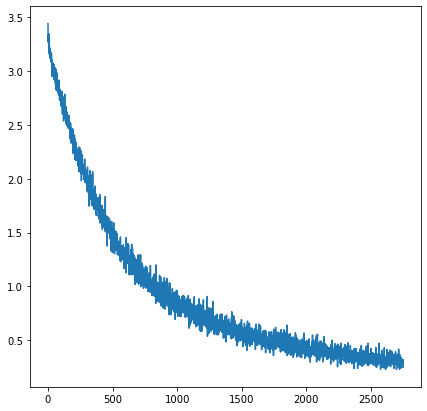

In [28]:
#--- set up ---
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('using gpu')
else:
    print('using cpu')
    device = torch.device('cpu')

model = CNN().to(device)

# OPTIMIZERS & RGURALIZATION

# EARLY STOP AFTER 8th EPOCH, when train acc about 98.6%, AVG Test acc 96.15%
optimizer_1 = optim.Adam(model.parameters(), lr=LR, weight_decay=0.05)

# EARLY STOP AFTER 3rd EPOCH, when train acc about 92.86%, AVG Test acc 82.77%
optimizer_2 = optim.RMSprop(model.parameters(), lr=LR, weight_decay=0.1)

# RUNS THROUGH ALL 10 EPOCHS, final train acc about 95.36%, AVG Test acc 91.26%
optimizer_3 = optim.SGD(model.parameters(), lr=LR, momentum=0.5)

loss_function = nn.CrossEntropyLoss()

optimizer = optimizer_3

#--- training ---

previous_train_loss = 1000000

batch_losses = []

for epoch in range(N_EPOCHS):
    train_loss = 0
    train_correct = 0
    total = 0
    for batch_num, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        # Compute prediction error
        optimizer.zero_grad()
        pred = model(data)
        loss = loss_function(pred, target)

        train_loss += loss.item()
        
        batch_losses.append(loss.item())
        
        total += len(target)
        train_correct += torch.sum(pred.argmax(1) == target)
        
        # Backpropagation
        loss.backward()
        optimizer.step()

        print('Training: Epoch %d - Batch %d/%d: Loss: %.4f | Train Acc: %.3f%% (%d/%d)' % 
              (epoch, batch_num, len(train_loader), train_loss / (batch_num + 1), 
               100. * train_correct / total, train_correct, total))
    
    print("Epoch train loss: " + str(train_loss))
    print("Previous epoch train loss: " + str(previous_train_loss))
    
    # EARLY STOPPING
    if train_loss > previous_train_loss:
        print('early stopping')
        break
        
    previous_train_loss = train_loss

plt.figure(figsize=(7, 7))
plt.plot(batch_losses)
plt.show()

Evaluating: Batch 0/37: Loss: 0.3852 | Test Acc: 93.000% (93/100)
Evaluating: Batch 1/37: Loss: 0.3911 | Test Acc: 92.000% (184/200)
Evaluating: Batch 2/37: Loss: 0.3698 | Test Acc: 92.000% (276/300)
Evaluating: Batch 3/37: Loss: 0.3587 | Test Acc: 91.500% (366/400)
Evaluating: Batch 4/37: Loss: 0.3555 | Test Acc: 91.800% (459/500)
Evaluating: Batch 5/37: Loss: 0.3706 | Test Acc: 91.167% (547/600)
Evaluating: Batch 6/37: Loss: 0.3856 | Test Acc: 91.000% (637/700)
Evaluating: Batch 7/37: Loss: 0.3894 | Test Acc: 91.250% (730/800)
Evaluating: Batch 8/37: Loss: 0.3946 | Test Acc: 91.000% (819/900)
Evaluating: Batch 9/37: Loss: 0.3927 | Test Acc: 90.900% (909/1000)
Evaluating: Batch 10/37: Loss: 0.3864 | Test Acc: 91.091% (1002/1100)
Evaluating: Batch 11/37: Loss: 0.3841 | Test Acc: 91.083% (1093/1200)
Evaluating: Batch 12/37: Loss: 0.3811 | Test Acc: 91.308% (1187/1300)
Evaluating: Batch 13/37: Loss: 0.3785 | Test Acc: 91.571% (1282/1400)
Evaluating: Batch 14/37: Loss: 0.3757 | Test Acc: 

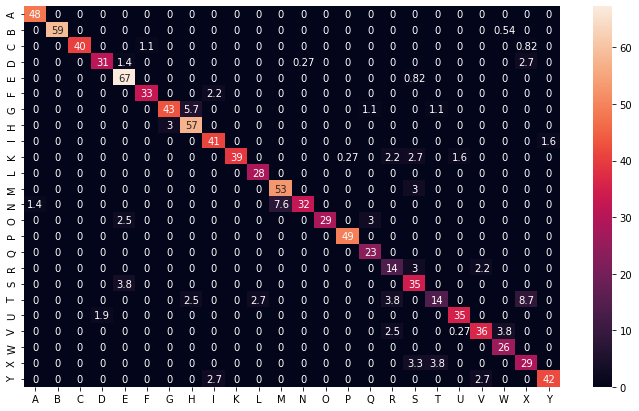

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#--- test ---
test_loss = 0
test_correct = 0
total = 0

test_acc_all = 0

preds = []
targets = []

with torch.no_grad():
    for batch_num, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        
        pred = model(data)
        loss = loss_function(pred, target)
        
        test_loss += loss.item()
        total += len(target)
        test_correct += torch.sum(pred.argmax(1) == target)
        preds.extend(pred.argmax(1).cpu().numpy())
        targets.extend(target.cpu().numpy())
        
        test_acc_all += (test_correct / total)

        print('Evaluating: Batch %d/%d: Loss: %.4f | Test Acc: %.3f%% (%d/%d)' % 
              (batch_num, len(test_loader), test_loss / (batch_num + 1), 
               100. * test_correct / total, test_correct, total))

    cf_matrix = confusion_matrix(targets, preds)
    df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix) * 1000, 
                         index = [i for i in 'ABCDEFGHIKLMNOPQRSTUVWXY'],
                         columns=[i for i in 'ABCDEFGHIKLMNOPQRSTUVWXY'])
    plt.figure(figsize=(12, 7))
    sn.heatmap(df_cm, annot=True)

    
print('AVG test acc:' + str(test_acc_all*100/len(test_loader)) + '%')